In [1]:
# %% [markdown]
# ### Importing the Necessary Libraries

# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import folium
from folium.plugins import HeatMap

import datetime


In [4]:
# %% [markdown]
# ### Sample Data Preparation
# Below is an example of loading the data and preparing the key features.

# %%
# For demonstration, let’s load a dataset from a CSV.
# One publicly available option is the USGS Earthquake Catalog dataset.
# You can download a CSV from:
# https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv

# If you have downloaded the CSV, load it as follows:
data = pd.read_csv("/Users/deephabiswashi/Desktop/ML/Earthquake Prediction Model/datasets/all_month.csv")  # Replace with your local CSV path

# Let's assume the dataset has these columns: 'time', 'latitude', 'longitude', 'depth', 'mag'
# Convert the 'time' column (ISO 8601 format) to a datetime object, then to Unix time.
data['time'] = pd.to_datetime(data['time'])
data['unix_time'] = data['time'].apply(lambda x: x.timestamp())

# Let’s keep the required columns:
data = data[['unix_time', 'latitude', 'longitude', 'depth', 'mag']]
data.rename(columns={'mag': 'magnitude'}, inplace=True)
print(data.head())


      unix_time   latitude   longitude    depth  magnitude
0  1.739808e+09  63.426100 -146.061800  13.1000       1.60
1  1.739807e+09  62.193300 -151.753500  93.3000       2.40
2  1.739806e+09  38.835167 -122.807999  -0.6900       0.73
3  1.739806e+09  38.813999 -122.825333   2.1400       0.98
4  1.739806e+09  32.099000 -102.128000   5.7095       1.20


In [5]:
# %% [markdown]
# ### Scaling the Data for Model Inputs
# We will scale the input features using StandardScaler.

# %%
# Define inputs and outputs
X = data[['unix_time', 'latitude', 'longitude']]
y = data[['magnitude', 'depth']]

# Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optionally, you can scale y as well if the ranges are very different,
# but in this example, we'll assume y can be predicted as-is.


In [6]:
# %% [markdown]
# ### Visualizing Earthquake Data on a World Map

# %%
# Create a base map
m = folium.Map(location=[0, 0], zoom_start=2)

# Prepare data for heat map: list of [latitude, longitude, weight]
heat_data = [[row['latitude'], row['longitude']] for index, row in data.iterrows()]

# Add heat map to the base map
HeatMap(heat_data, radius=5, blur=3).add_to(m)

# Save map to an HTML file to view in a browser
m.save("earthquake_heatmap.html")
print("Map saved as earthquake_heatmap.html. Open this file in your browser to view the heatmap.")


Map saved as earthquake_heatmap.html. Open this file in your browser to view the heatmap.


In [7]:
# %% [markdown]
# ### Splitting the Dataset into Training and Testing Sets

# %%
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (7207, 3)
Test set size: (1802, 3)


In [8]:
# %% [markdown]
# ### Building the Neural Network Model

# %%
# Define the model architecture
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='linear')  # Two outputs: magnitude and depth
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


/Users/deephabiswashi/Desktop/ML/Earthquake Prediction Model/venv1/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,898 (11.32 KB)

 Trainable params: 2,898 (11.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 794.2999 - mae: 8.6856 - val_loss: 510.2960 - val_mae: 8.5744
Epoch 2/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 903.1367 - mae: 9.2787 - val_loss: 535.9515 - val_mae: 8.2724
Epoch 3/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 704.0811 - mae: 8.5444 - val_loss: 590.9421 - val_mae: 8.6952
Epoch 4/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 738.0845 - mae: 8.5184 - val_loss: 469.3918 - val_mae: 8.0836
Epoch 5/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 744.9839 - mae: 8.5304 - val_loss: 529.6724 - val_mae: 8.8350
Epoch 6/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 787.1286 - mae: 8.7878 - val_loss: 465.1258 - val_mae: 8.1310
Epoch 7/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 787.1843 - mae: 8.7256 - val_loss: 489.8150 - val_mae: 8.3735
Epoch 8/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 811.7312 - mae: 8.7617 - val_loss: 478.8914 - val_mae: 8.0937
Epoch 9/

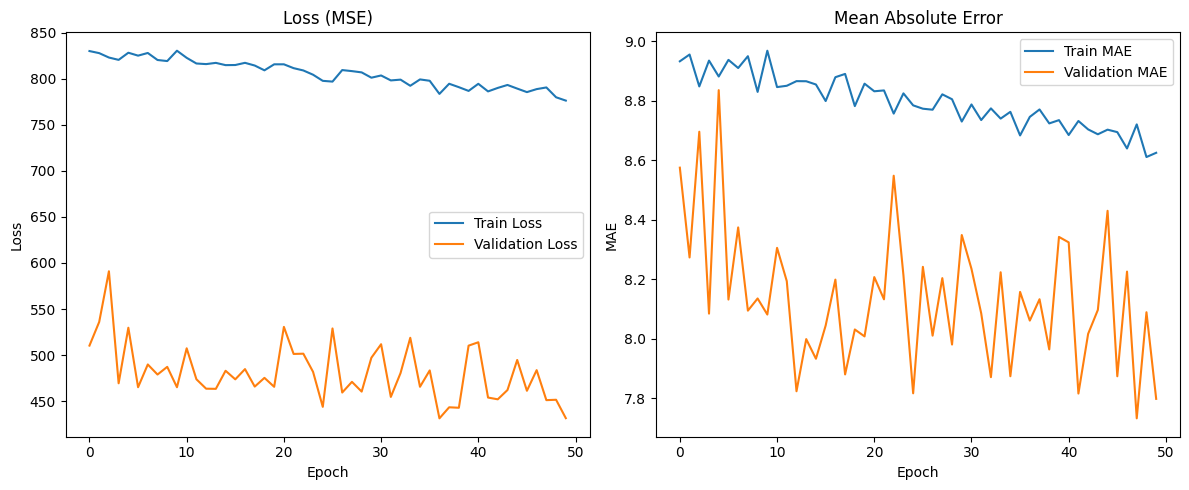

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step


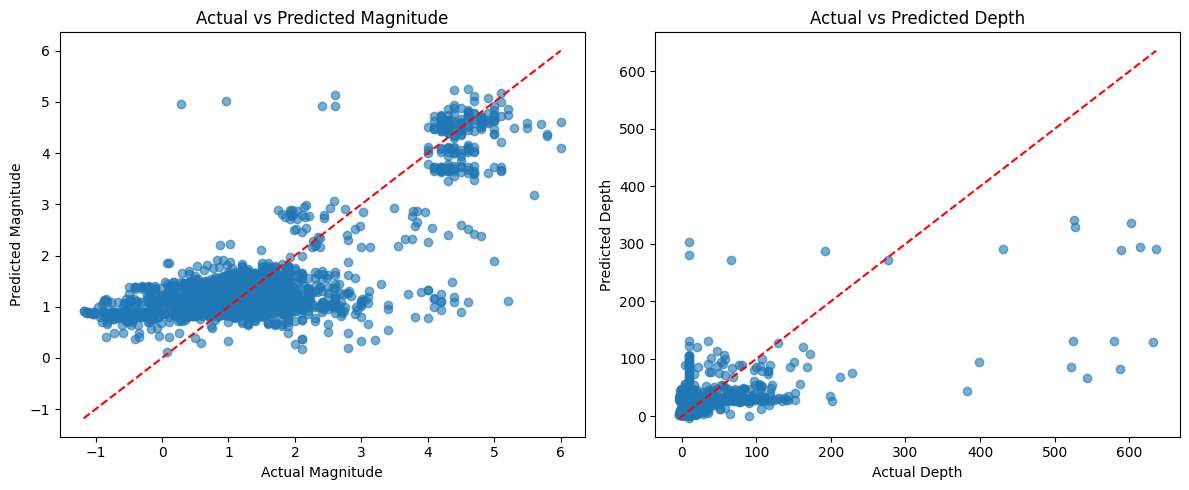

In [14]:
# %% [markdown]
# ### Training the Neural Network

# %%
# Train the model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=32)

# %% [markdown]
# ### Model Evaluation

# %%
# Evaluate on the test set
loss, mae = model.evaluate(X_test, y_test)
print("Test Loss (MSE):", loss)
print("Test MAE:", mae)

# %% [markdown]
# ### Plotting Training History

# %%
plt.figure(figsize=(12,5))

# Plot loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# %% [markdown]
# ### Additional Visualizations (Predictions vs. True Values)
# Let's compare the predictions with the true values for a few test samples.

# %%
# Predict on test set
y_pred = model.predict(X_test)

# Convert the predictions and actual values to DataFrame for easier plotting
df_results = pd.DataFrame({
    'Predicted Magnitude': y_pred[:,0],
    'Actual Magnitude': y_test['magnitude'].values,
    'Predicted Depth': y_pred[:,1],
    'Actual Depth': y_test['depth'].values
})

# Plot for Magnitude
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(df_results['Actual Magnitude'], df_results['Predicted Magnitude'], alpha=0.6)
plt.plot([df_results['Actual Magnitude'].min(), df_results['Actual Magnitude'].max()], 
         [df_results['Actual Magnitude'].min(), df_results['Actual Magnitude'].max()], 'r--')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Actual vs Predicted Magnitude')

# Plot for Depth
plt.subplot(1,2,2)
plt.scatter(df_results['Actual Depth'], df_results['Predicted Depth'], alpha=0.6)
plt.plot([df_results['Actual Depth'].min(), df_results['Actual Depth'].max()], 
         [df_results['Actual Depth'].min(), df_results['Actual Depth'].max()], 'r--')
plt.xlabel('Actual Depth')
plt.ylabel('Predicted Depth')
plt.title('Actual vs Predicted Depth')

plt.tight_layout()
plt.show()


In [17]:
# %% [markdown]
# ### Saving the Trained Model and Scaler

# %%
import os
import pickle

# Define the directory where you want to save the model and scaler
save_dir = 'saved_models_scalar'
os.makedirs(save_dir, exist_ok=True)

# Define file paths
model.save('saved_models_scalar/earthquake_model.keras')
scaler_save_path = os.path.join(save_dir, 'scaler.pkl')

# Save the model using TensorFlow's save functionality
model.save(model_save_path)
print("Model saved successfully at:", model_save_path)

# Save the scaler object using pickle
with open(scaler_save_path, 'wb') as f:
    pickle.dump(scaler, f)
print("Scaler saved successfully at:", scaler_save_path)


Model saved successfully at: saved_models_scalar/earthquake_model.h5
Scaler saved successfully at: saved_models_scalar/scaler.pkl
